# バギング

In [0]:
import pandas as pd

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer 

In [0]:
cancer = load_breast_cancer()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=42
)

In [0]:
# 決定木モデルとバギングの設定
models = {
    'tree': DecisionTreeClassifier(),
    'bagging': BaggingClassifier(DecisionTreeClassifier(), 
                                 n_estimators=100, 
                                 random_state=0)
}

In [0]:
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)
    
pd.Series(scores).unstack()

,test_score,train_score
bagging,0.944056,1.0
tree,0.930070,1.0


### ボストン

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.datasets import load_boston

In [0]:
boston = load_boston()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=42
)

In [0]:
# 決定木モデルとバギングの設定
models = {
    'tree': DecisionTreeRegressor(),
    'bagging': BaggingRegressor(DecisionTreeRegressor(), 
                                n_estimators=100, 
                                random_state=0)
}

In [0]:
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)
    
pd.Series(scores).unstack()

,test_score,train_score
bagging,0.849846,0.978877
tree,0.674804,1.000000


# ブースティング

In [0]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer 

In [0]:
cancer = load_breast_cancer()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=42
)

In [0]:
models = {
    'tree': DecisionTreeClassifier(random_state=0),
    'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(), random_state=0)
}

In [0]:
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)
pd.Series(scores).unstack()

,test_score,train_score
AdaBoost,0.923077,1.0
tree,0.937063,1.0


In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.datasets import load_boston

In [0]:
boston = load_boston()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=42
)

In [0]:
models = {
    'tree': DecisionTreeRegressor(random_state=0),
    'AdaBoost': AdaBoostRegressor(DecisionTreeRegressor(), random_state=0)
}

In [0]:
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)
pd.Series(scores).unstack()

,test_score,train_score
AdaBoost,0.926081,0.999413
tree,0.692137,1.000000


# ランダムフォレスト、勾配ブースティング

In [0]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import load_boston

In [0]:
boston = load_boston()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=42
)

In [0]:
models = {
    'RandomForest': RandomForestRegressor(random_state=0),
    'GradientBoost': GradientBoostingRegressor(random_state=0)
}

In [0]:
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

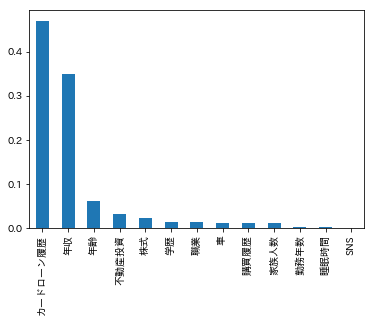

In [0]:
# モデル構築の中でどの変数が重要な役割を担ったのかを定量的に把握する
s = pd.Series(models['RandomForest'].feature_importances_, 
              index=boston.feature_names )

# 取得した値を降順に表示
s.sort_values(ascending=False).plot.bar(color='C0')

In [0]:
boston.feature_names =["不動産投資","睡眠時間","家族人数","SNS","学歴","年収",
                    "車","年齢","勤務年数","購買履歴","株式",
                   "職業","カードローン履歴"]

In [0]:
boston.feature_names

['\xe4\xb8\x8d\xe5\x8b\x95\xe7\x94\xa3\xe6\x8a\x95\xe8\xb3\x87',
 '\xe7\x9d\xa1\xe7\x9c\xa0\xe6\x99\x82\xe9\x96\x93',
 '\xe5\xae\xb6\xe6\x97\x8f\xe4\xba\xba\xe6\x95\xb0',
 'SNS',
 '\xe5\xad\xa6\xe6\xad\xb4',
 '\xe5\xb9\xb4\xe5\x8f\x8e',
 '\xe8\xbb\x8a',
 '\xe5\xb9\xb4\xe9\xbd\xa2',
 '\xe5\x8b\xa4\xe5\x8b\x99\xe5\xb9\xb4\xe6\x95\xb0',
 '\xe8\xb3\xbc\xe8\xb2\xb7\xe5\xb1\xa5\xe6\xad\xb4',
 '\xe6\xa0\xaa\xe5\xbc\x8f',
 '\xe8\x81\xb7\xe6\xa5\xad',
 '\xe3\x82\xab\xe3\x83\xbc\xe3\x83\x89\xe3\x83\xad\xe3\x83\xbc\xe3\x83\xb3\xe5\xb1\xa5\xe6\xad\xb4']